 <h1><center>Credit Card Fraud Detection</center></h1>

<img src="image.jpeg" alt="Drawing" style="width: 200px;"/>

### Rational Statement

<p style='text-align: justify;'> Although the increasing digitalization of the payments and money transfer services has indisputable benefits, it has some disadvantages as well. Certainly, one of these is the growth of frauds.  According to the Nilson Report, publication covering the card and mobile payment industry, payment card fraud losses worldwide reached US\$27.85 billion in 2018 and are expected to rise to $35.67 billion in 2024.</p> 

<p style='text-align: justify;'> As transaction times becomes faster and fraudster schemes are continuously innovating, it is almost impossible to identify, predict and  counteract fraudulent operations without an robust automation process. Thus, trying to reduce their loss payouts, payment card issuers and merchants have been trying ingenious tools. Machine learning, for instance, is one of the most efficient and, therefore, is progressively being used.  </p>


<p style='text-align: justify;'> Hence, in line with market trends, this project aims to build a machine learning model that, based on labeled historical data, detect fraudulent operations. </p>



### Data Requirements

<p style='text-align: justify;'>The dataset, gathered from Kaggle.com, comprises of 284,807 credit card operations, being 284,315 non-fraudulent and 492 fraudulents. Therefore, highly unbalaced.</p> 
    
<p style='text-align: justify;'>There are a total of 31 features, all of them numerical. Due to confidentiality reasons, Principal Component Analysis was used to transform data from 28 features. The only features which have not been transformed are: Time, Amount and Class. The first refers to the time elapsed between each transaction and the first one occured in the dataset. The second is the transaction amount. Lastly, the third is a binary variable, which has value 1 for fraudulent transactions and 0 otherwise.</p>



### Assumptions, Limitations and Constraints

<p style='text-align: justify;'>The first challenge is to handle the unbalanced data. In this case, in order to verify the quality of the model, we can not rely only in its accuracy. In other words, we will need additional metrics, such as precision and recall, to be certain of its quality.</p>

<p style='text-align: justify;'>Considering the trade off between false positive and false negative predictions, as we are dealing with frauds, it is better to try to minimize the ratio of false negatives. That is, fraudulent transaction considered as non-fraudulent.</p>  

<p style='text-align: justify;'>Another critical question is the wide range of the variable ‘Amount’, which goes from $0 to \$25,691.16. Since, depending on the model being used, the great difference in scales between variables might bias it towards one feature, we should opt for feature scaling.</p> 



### Test Process

<p style='text-align: justify;'>To guarantee the quality of the work, three machine learning models will be fitted and tested: logistic regression, decision tree and random forest. Before doing it, however, we will identify and eventually replace missing values. Similar treatment will be used for the outliers </p>.

<p style='text-align: justify;'> Regarding the skewness of the variable Class, our target, and the best way to deal with it, we can choose between two methods. One is over-sampling, that is, duplicating data in the minority class or fraudulent transactions. The other is to synthesize data from existing ones.</p>

<p style='text-align: justify;'>Finally, in order to avoid overfitting, the k-fold cross-validation technique will be used.</p>

In [96]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')


In [97]:
df = pd.read_csv('creditcard.csv')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [99]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0


In [100]:
pd.set_option('precision', 3)

df.loc[:, ['Amount']].describe()

,Amount
count,284807.000
mean,88.350
std,250.120
min,0.000
25%,5.600
50%,22.000
75%,77.165
max,25691.160


### Highly Unbalanced Dataset

In [101]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes

0    284315
1       492
Name: Class, dtype: int64

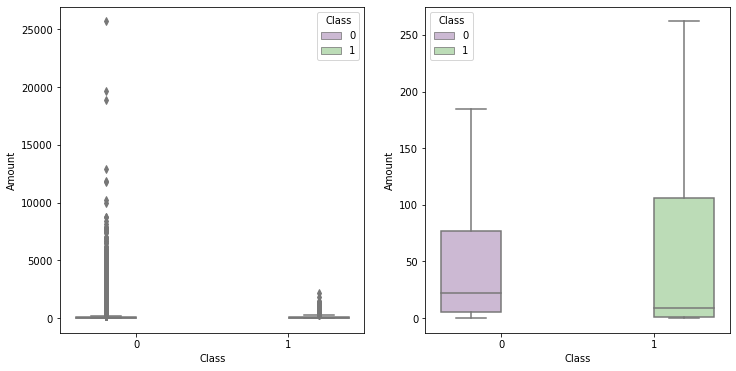

In [102]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show()

Text(0.5, 1.0, 'Distribution of Amount')

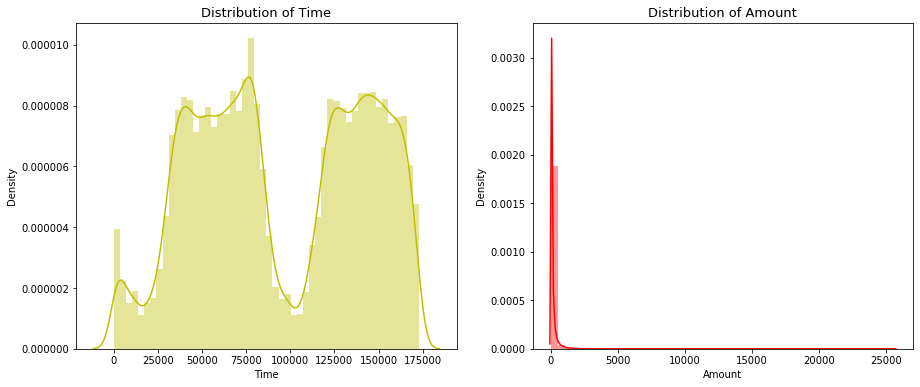

In [103]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(df['Time'], ax=ax1, color='y')
ax2 = sns.distplot(df['Amount'], ax=ax2, color='r')
ax1.set_title('Distribution of Time', fontsize=13)
ax2.set_title('Distribution of Amount', fontsize=13)

In [104]:
from sklearn.preprocessing import StandardScaler
df['normalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

In [105]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0,0.245
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0,-0.342
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0,1.161
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0,0.141
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0,-0.073


In [106]:
df = df.drop(['Time'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0,0.245
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0,-0.342
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0,1.161
3,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0,0.141
4,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0,-0.073


In [107]:
X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']

### DECISION TREE

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [140]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [141]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [142]:
y_pred = decision_tree.predict(X_test)

In [143]:
decision_tree.score(X_test,y_test)

0.9992977774656788

In [144]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [145]:
cnf_matrix = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[85271    25]
 [   35   112]]


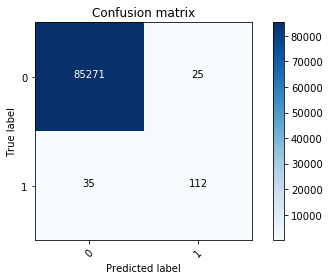

In [146]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.77      0.75      0.76       147

    accuracy                           1.00     85443
   macro avg       0.88      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [115]:
y_pred = decision_tree.predict(X)

In [116]:
y_expected = pd.DataFrame(y)

Confusion matrix, without normalization
[[284282     33]
 [    37    455]]


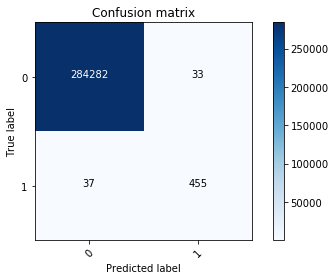

In [117]:
cnf_matrix = confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

### RANDOM FOREST

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
random_forest = RandomForestClassifier(n_estimators=100)

In [120]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [121]:
y_pred = random_forest.predict(X_test)

In [122]:
random_forest.score(X_test,y_test)

0.9995201479348805

In [123]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [124]:
cnf_matrix = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[85290     6]
 [   35   112]]


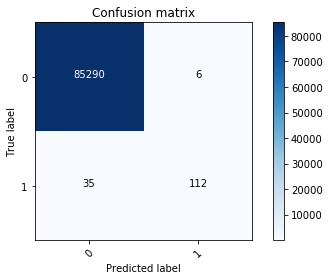

In [125]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [126]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [127]:
y_pred = random_forest.predict(X)

In [128]:
cnf_matrix = confusion_matrix(y,y_pred.round())

Confusion matrix, without normalization
[[284309      6]
 [    35    457]]


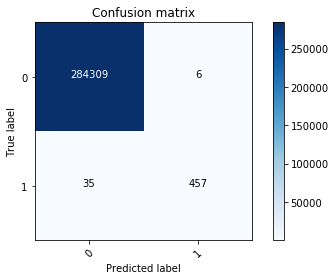

In [129]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

### LOGISTIC REGRESSION

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
y_pred = logmodel.predict(X_test)

In [133]:
cnf_matrix = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[85284    12]
 [   56    91]]


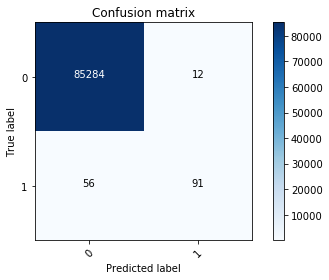

In [134]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [136]:
y_pred = random_forest.predict(X)

In [137]:
cnf_matrix = confusion_matrix(y,y_pred)

Confusion matrix, without normalization
[[284309      6]
 [    35    457]]


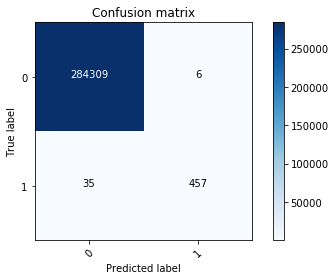

In [138]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

### Considering the test dataset of the three models, all of them have high level of accuracy. However, the number of false negatives is much higher in the logistic regression. Therefore, this one should not be chosen.